In [1]:
from bs4 import BeautifulSoup
import requests

url = "https://www.formula1.com/en/latest/article.verstappen-summoned-to-stewards-over-yellow-flags-incident-in-qatar.6UzAVRNxbo9USrKrbwcFrK.html"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
type(soup)

bs4.BeautifulSoup

In [2]:
context = """
<div class="f1-article--rich-text">
<p><strong>Max Verstappen has been summoned to the stewards after allegedly failing to slow for double waved yellow flags in Saturday's qualifying session in Qatar.</strong></p>
<p>The Red Bull driver was on his final flying run in the last part of qualifying at the Losail International Circuit when ahead of him on the track, AlphaTauri's Pierre Gasly suffered a front wing issue and a puncture, causing him to slow to a stop on the main straight.</p>
<p>Double waved yellows were briefly shown, with Verstappen then completing his lap and improving his time by almost two-tenths of a second over his previous best, though that was not enough to improve the P2 grid slot he already held.</p>
<p>After qualifying the Dutchman said Gasly's problem had not been an issue for him. “I heard after the session he'd damaged his front wing. But from my side, was all okay,” he said.</p>
<div class="f1-article--rich-text">
<p>But almost three hours after qualifying, the stewards announced they had summoned Verstappen to see them on Sunday at 1pm local time in Qatar.</p>
<p>The document said the summons was in relation to an &quot;alleged breach of Appendix H, Art. 2.5.5.b) of the FIA International Sporting Code and non-compliance with Race Director’s Event Notes 7.1, not respecting double waved yellow flags at 18:00.&quot;</p>
<p>Verstappen could be at risk of a grid penalty if the stewards decide he has fallen foul of the rules.</p>
<p>Meanwhile, Ferrari driver Carlos Sainz and Mercedes' Valtteri Bottas will also be required to make an appearance in front of the stewards on Sunday afternoon over their alleged passing of single waved yellow flags.
</p>
"""
def remove_tags(html):
    soup = BeautifulSoup(html,"html.parser")
    for data in soup(['style','script']):
        data.decompose()
    return ' '.join(soup.stripped_strings)
print(remove_tags(context))

Max Verstappen has been summoned to the stewards after allegedly failing to slow for double waved yellow flags in Saturday's qualifying session in Qatar. The Red Bull driver was on his final flying run in the last part of qualifying at the Losail International Circuit when ahead of him on the track, AlphaTauri's Pierre Gasly suffered a front wing issue and a puncture, causing him to slow to a stop on the main straight. Double waved yellows were briefly shown, with Verstappen then completing his lap and improving his time by almost two-tenths of a second over his previous best, though that was not enough to improve the P2 grid slot he already held. After qualifying the Dutchman said Gasly's problem had not been an issue for him. “I heard after the session he'd damaged his front wing. But from my side, was all okay,” he said. But almost three hours after qualifying, the stewards announced they had summoned Verstappen to see them on Sunday at 1pm local time in Qatar. The document said the

In [3]:
import re
import nltk
import pprint
import numpy as np
from nltk.tokenize.sonority_sequencing import SyllableTokenizer
from nltk.tokenize.stanford_segmenter import StanfordSegmenter
from nltk.tokenize.texttiling import TextTilingTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.tokenize.util import regexp_span_tokenize, string_span_tokenize

In [4]:
from nltk.tokenize import TweetTokenizer, sent_tokenize
context = """
Max Verstappen has been summoned to the stewards after allegedly failing to slow for double waved yellow flags in Saturday's qualifying session in Qatar. The Red Bull driver was on 
his final flying run in the last part of qualifying at the Losail International Circuit when ahead of him on the track, AlphaTauri's Pierre Gasly suffered a front wing issue and a puncture, causing him
to slow to a stop on the main straight. Double waved yellows were briefly shown, with Verstappen then completing his lap and improving his time by almost two-tenths of a second over his previous best, 
though that was not enough to improve the P2 grid slot he already held. After qualifying the Dutchman said Gasly's problem had not been an issue for him. “I heard after the session he'd damaged his front wing. 
But from my side, was all okay,” he said. But almost three hours after qualifying, the stewards announced they had summoned Verstappen to see them on Sunday at 1pm local time in Qatar. The document said the summons was in relation to an "alleged breach of Appendix H, Art. 2.5.5.b)
of the FIA International Sporting Code and non-compliance with Race Director’s Event Notes 7.1, not respecting double waved yellow flags at 18:00." Verstappen could be at risk of a grid penalty if the stewards decide he has fallen foul of the rules. 
Meanwhile, Ferrari driver Carlos Sainz and Mercedes' Valtteri Bottas will also be required to make an appearance in front of the stewards on Sunday afternoon over their alleged passing of single waved yellow flags.
"""
tokenizer_words = TweetTokenizer()
tokens_sentences = [tokenizer_words.tokenize(t) for t in nltk.sent_tokenize(context)]
print(tokens_sentences)

[['Max', 'Verstappen', 'has', 'been', 'summoned', 'to', 'the', 'stewards', 'after', 'allegedly', 'failing', 'to', 'slow', 'for', 'double', 'waved', 'yellow', 'flags', 'in', "Saturday's", 'qualifying', 'session', 'in', 'Qatar', '.'], ['The', 'Red', 'Bull', 'driver', 'was', 'on', 'his', 'final', 'flying', 'run', 'in', 'the', 'last', 'part', 'of', 'qualifying', 'at', 'the', 'Losail', 'International', 'Circuit', 'when', 'ahead', 'of', 'him', 'on', 'the', 'track', ',', "AlphaTauri's", 'Pierre', 'Gasly', 'suffered', 'a', 'front', 'wing', 'issue', 'and', 'a', 'puncture', ',', 'causing', 'him', 'to', 'slow', 'to', 'a', 'stop', 'on', 'the', 'main', 'straight', '.'], ['Double', 'waved', 'yellows', 'were', 'briefly', 'shown', ',', 'with', 'Verstappen', 'then', 'completing', 'his', 'lap', 'and', 'improving', 'his', 'time', 'by', 'almost', 'two-tenths', 'of', 'a', 'second', 'over', 'his', 'previous', 'best', ',', 'though', 'that', 'was', 'not', 'enough', 'to', 'improve', 'the', 'P2', 'grid', 'slot'

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(context)
print(fdist)

<FreqDist with 61 samples and 1546 outcomes>


In [6]:
fdist.most_common(2)

[(' ', 261), ('e', 137)]

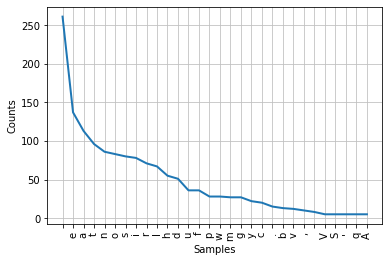

In [7]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False,label='Theoretical')
plt.show()

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(context)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
print(filtered_sentence)

['Max', 'Verstappen', 'summoned', 'stewards', 'allegedly', 'failing', 'slow', 'double', 'waved', 'yellow', 'flags', 'Saturday', "'s", 'qualifying', 'session', 'Qatar', '.', 'The', 'Red', 'Bull', 'driver', 'final', 'flying', 'run', 'last', 'part', 'qualifying', 'Losail', 'International', 'Circuit', 'ahead', 'track', ',', 'AlphaTauri', "'s", 'Pierre', 'Gasly', 'suffered', 'front', 'wing', 'issue', 'puncture', ',', 'causing', 'slow', 'stop', 'main', 'straight', '.', 'Double', 'waved', 'yellows', 'briefly', 'shown', ',', 'Verstappen', 'completing', 'lap', 'improving', 'time', 'almost', 'two-tenths', 'second', 'previous', 'best', ',', 'though', 'enough', 'improve', 'P2', 'grid', 'slot', 'already', 'held', '.', 'After', 'qualifying', 'Dutchman', 'said', 'Gasly', "'s", 'problem', 'issue', '.', '“', 'I', 'heard', 'session', "'d", 'damaged', 'front', 'wing', '.', 'But', 'side', ',', 'okay', ',', '”', 'said', '.', 'But', 'almost', 'three', 'hours', 'qualifying', ',', 'stewards', 'announced', 'su

In [9]:
import string
sentences = [[], ['Max', 'Verstappen', 'summoned', 'stewards', 'allegedly', 'failing', 'slow', 'double', 'waved', 'yellow', 
                  'flags', 'Saturday', "'s", 'qualifying', 'session', 'Qatar', '.', 'The', 'Red', 'Bull', 'driver', 'final', 'flying', 'run', 'last', 'part', 'qualifying', 'Losail', 'International', 
                  'Circuit', 'ahead', 'track', ','], ['Pierre', 'Gasly', 'suffered', 'front', 'wing', 'issue', 'puncture', ',', 
                  'causing', 'slow', 'stop', 'main', 'straight', '.'],['Double', 'waved', 'yellows', 'briefly', 'shown', ',', 'Verstappen', 
                  'completing', 'lap', 'improving', 'time', 'almost', 'two-tenths', 'second', 'previous', 'best', ',', 'though', 'enough', 
                  'improve', 'P2', 'grid', 'slot', 'already', 'held', '.'], ['After', 'qualifying', 'Dutchman', 'said', 'Gasly', "'s", 'problem', 'issue', '.', 
                  '“', 'I', 'heard', 'session', "'d", 'damaged', 'front', 'wing', '.'], ['But', 'side', ',', 'okay', ',', '”', 'said', '.',],
                 ['But', 'almost', 'three', 'hours', 'qualifying', ',', 'stewards', 'announced', 'summoned', 'Verstappen', 'see', 'Sunday', '1pm', 'local', 'time', 'Qatar', '.'],
                 ['The', 'document', 'said', 'summons', 'relation', '``', 'alleged', 'breach', 'Appendix', 'H', ',', 'Art', '.', '2.5.5.b', 'FIA', 'International', 'Sporting', 'Code', 'non-compliance', 'Race', 'Director', '’', 'Event', 'Notes', '7.1', ',', 
                 'respecting', 'double', 'waved', 'yellow', 'flags', '18:00', '.'],
                 ["''", 'Verstappen', 'could', 'risk', 'grid', 'penalty', 'stewards', 'decide', 'fallen', 'foul', 'rules', '.', 'Meanwhile', ',', 'Ferrari', 'driver', 'Carlos', 'Sainz', 
                  'Mercedes', "'", 'Valtteri', 'Bottas', 'also', 'required', 'make', 'appearance', 'front', 'stewards', 'Sunday', 'afternoon', 'alleged', 'passing', 'single', 'waved', 'yellow', 'flags', '.'], []]
result = [list(filter(lambda x: x not in string.punctuation, sentence)) for sentence in sentences]
print(result)

[[], ['Max', 'Verstappen', 'summoned', 'stewards', 'allegedly', 'failing', 'slow', 'double', 'waved', 'yellow', 'flags', 'Saturday', "'s", 'qualifying', 'session', 'Qatar', 'The', 'Red', 'Bull', 'driver', 'final', 'flying', 'run', 'last', 'part', 'qualifying', 'Losail', 'International', 'Circuit', 'ahead', 'track'], ['Pierre', 'Gasly', 'suffered', 'front', 'wing', 'issue', 'puncture', 'causing', 'slow', 'stop', 'main', 'straight'], ['Double', 'waved', 'yellows', 'briefly', 'shown', 'Verstappen', 'completing', 'lap', 'improving', 'time', 'almost', 'two-tenths', 'second', 'previous', 'best', 'though', 'enough', 'improve', 'P2', 'grid', 'slot', 'already', 'held'], ['After', 'qualifying', 'Dutchman', 'said', 'Gasly', "'s", 'problem', 'issue', '“', 'I', 'heard', 'session', "'d", 'damaged', 'front', 'wing'], ['But', 'side', 'okay', '”', 'said'], ['But', 'almost', 'three', 'hours', 'qualifying', 'stewards', 'announced', 'summoned', 'Verstappen', 'see', 'Sunday', '1pm', 'local', 'time', 'Qatar

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(context)
len(context)

1546

In [11]:
from nltk.corpus import words 
train = ['Max', 'Verstappen', 'summoned', 'stewards', 'allegedly', 'failing', 'slow', 'double', 'waved', 'yellow', 
        'flags', 'Saturday', "'s", 'qualifying', 'session', 'Qatar', 'The', 'Red', 'Bull', 'driver', 'final', 'flying', 
        'run', 'last', 'part', 'qualifying', 'Losail', 'International', 'Circuit', 'ahead', 'track','Pierre', 'Gasly', 
        'suffered', 'front', 'wing', 'issue', 'puncture', 'causing', 'slow', 'stop', 'main', 'straight','Double', 'waved', 
        'yellows', 'briefly', 'shown', 'Verstappen', 'completing', 'lap', 'improving', 'time', 'almost', 'two-tenths', 'second'
        'previous', 'best', 'though', 'enough', 'improve', 'P2', 'grid', 'slot', 'already', 'held','After', 'qualifying', 'Dutchman', 
        'said', 'Gasly', "'s", 'problem', 'issue', '“', 'I', 'heard', 'session', "'d", 'damaged', 'front', 'wing', 'But', 'side',
        'okay', '”', 'said', 'But', 'almost', 'three', 'hours', 'qualifying', 'stewards', 'announced', 'summoned', 'Verstappen', 
        'see', 'Sunday', '1pm', 'local', 'time', 'Qatar','The', 'document', 'said', 'summons', 'relation', '``', 'alleged', 'breach', 
        'Appendix', 'H', 'Art', '2.5.5.b', 'FIA', 'International', 'Sporting', 'Code', 'non-compliance', 'Race', 'Director', '’', 'Event', 
        'Notes', '7.1', 'respecting', 'double', 'waved', 'yellow', 'flags', '18:00', "''", 'Verstappen', 'could', 'risk', 'grid', 'penalty', 
        'stewards', 'decide', 'fallen', 'foul', 'rules', 'Meanwhile', 'Ferrari', 'driver', 'Carlos', 'Sainz', 'Mercedes', 'Valtteri', 'Bottas', 
        'also', 'required', 'make', 'appearance', 'front', 'stewards', 'Sunday', 'afternoon', 'alleged', 'passing', 'single', 'waved', 'yellow', 'flags']
final = []
for i in train:
    if i in words.words():
        final.append(i)
print(final)     

['Max', 'allegedly', 'failing', 'slow', 'double', 'waved', 'yellow', 'Saturday', 'session', 'The', 'Red', 'driver', 'final', 'flying', 'run', 'last', 'part', 'ahead', 'track', 'Pierre', 'front', 'wing', 'issue', 'puncture', 'causing', 'slow', 'stop', 'main', 'straight', 'waved', 'yellows', 'briefly', 'shown', 'lap', 'improving', 'time', 'almost', 'best', 'though', 'enough', 'improve', 'grid', 'slot', 'already', 'Dutchman', 'said', 'problem', 'issue', 'I', 'session', 'front', 'wing', 'side', 'said', 'almost', 'three', 'see', 'Sunday', 'local', 'time', 'The', 'document', 'said', 'summons', 'relation', 'breach', 'H', 'Art', 'respecting', 'double', 'waved', 'yellow', 'could', 'risk', 'grid', 'penalty', 'decide', 'fallen', 'foul', 'driver', 'Carlos', 'Mercedes', 'also', 'make', 'appearance', 'front', 'Sunday', 'afternoon', 'passing', 'single', 'waved', 'yellow']


In [12]:
updated_final = []
for i in final:
    if i not in updated_final:
        updated_final.append(i)
print("The list after removing duplicates: " + str(updated_final))

The list after removing duplicates: ['Max', 'allegedly', 'failing', 'slow', 'double', 'waved', 'yellow', 'Saturday', 'session', 'The', 'Red', 'driver', 'final', 'flying', 'run', 'last', 'part', 'ahead', 'track', 'Pierre', 'front', 'wing', 'issue', 'puncture', 'causing', 'stop', 'main', 'straight', 'yellows', 'briefly', 'shown', 'lap', 'improving', 'time', 'almost', 'best', 'though', 'enough', 'improve', 'grid', 'slot', 'already', 'Dutchman', 'said', 'problem', 'I', 'side', 'three', 'see', 'Sunday', 'local', 'document', 'summons', 'relation', 'breach', 'H', 'Art', 'respecting', 'could', 'risk', 'penalty', 'decide', 'fallen', 'foul', 'Carlos', 'Mercedes', 'also', 'make', 'appearance', 'afternoon', 'passing', 'single']


In [13]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
stemmed_words = []
for w in updated_final:
    stemmed_words.append(ps.stem(w))
print("Filtered Sentence:", updated_final)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['Max', 'allegedly', 'failing', 'slow', 'double', 'waved', 'yellow', 'Saturday', 'session', 'The', 'Red', 'driver', 'final', 'flying', 'run', 'last', 'part', 'ahead', 'track', 'Pierre', 'front', 'wing', 'issue', 'puncture', 'causing', 'stop', 'main', 'straight', 'yellows', 'briefly', 'shown', 'lap', 'improving', 'time', 'almost', 'best', 'though', 'enough', 'improve', 'grid', 'slot', 'already', 'Dutchman', 'said', 'problem', 'I', 'side', 'three', 'see', 'Sunday', 'local', 'document', 'summons', 'relation', 'breach', 'H', 'Art', 'respecting', 'could', 'risk', 'penalty', 'decide', 'fallen', 'foul', 'Carlos', 'Mercedes', 'also', 'make', 'appearance', 'afternoon', 'passing', 'single']
Stemmed Sentence: ['max', 'allegedli', 'fail', 'slow', 'doubl', 'wave', 'yellow', 'saturday', 'session', 'the', 'red', 'driver', 'final', 'fli', 'run', 'last', 'part', 'ahead', 'track', 'pierr', 'front', 'wing', 'issu', 'punctur', 'caus', 'stop', 'main', 'straight', 'yellow', 'briefli', 'sh

In [14]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()
word = "briefly"
print("Lemmatized Word:", lem.lemmatize(word,"v"))
print("Stemmed Word:", stem.stem(word))

Lemmatized Word: briefly
Stemmed Word: briefli


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(updated_final)
X_train_counts.shape

(72, 70)

In [16]:
voc = []
total_words = 0
for doc in updated_final:
    token_temp = doc.split()
    total_words = total_words + len(token_temp)
    for i in range(len(token_temp)):
        if token_temp[i] not in voc:
            voc.append(token_temp[i])
voc.sort()
print(voc)
print('There are {} words in vocabulary.'.format(len(voc)))

['Art', 'Carlos', 'Dutchman', 'H', 'I', 'Max', 'Mercedes', 'Pierre', 'Red', 'Saturday', 'Sunday', 'The', 'afternoon', 'ahead', 'allegedly', 'almost', 'already', 'also', 'appearance', 'best', 'breach', 'briefly', 'causing', 'could', 'decide', 'document', 'double', 'driver', 'enough', 'failing', 'fallen', 'final', 'flying', 'foul', 'front', 'grid', 'improve', 'improving', 'issue', 'lap', 'last', 'local', 'main', 'make', 'part', 'passing', 'penalty', 'problem', 'puncture', 'relation', 'respecting', 'risk', 'run', 'said', 'see', 'session', 'shown', 'side', 'single', 'slot', 'slow', 'stop', 'straight', 'summons', 'though', 'three', 'time', 'track', 'waved', 'wing', 'yellow', 'yellows']
There are 72 words in vocabulary.


In [17]:
bow_vec = []
for i in range(len(updated_final)):
    text = updated_final[i].split()
    text_vec = []
    for j in range(len(voc)):
        if voc[j] in text:
            text_vec.append([voc[j]])
        else:
            text_vec.append(0)
    bow_vec.append(text_vec)
import pandas as pd 
pd.set_option("display.max_columns", None)
data = pd.DataFrame(bow_vec, columns = voc)
data[:10]

,Art,Carlos,Dutchman,H,I,Max,Mercedes,Pierre,Red,Saturday,Sunday,The,afternoon,ahead,allegedly,almost,already,also,appearance,best,breach,briefly,causing,could,decide,document,double,driver,enough,failing,fallen,final,flying,foul,front,grid,improve,improving,issue,lap,last,local,main,make,part,passing,penalty,problem,puncture,relation,respecting,risk,run,said,see,session,shown,side,single,slot,slow,stop,straight,summons,though,three,time,track,waved,wing,yellow,yellows
0,0,0,0,0,0,[Max],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[allegedly],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[failing],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[slow],0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[double],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[waved],0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[yellow],0
7,0,0,0,0,0,0,0,0,0,[Saturday],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[session],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,[The],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',lowercase=True)
word_count = cv.fit_transform(data)
print(cv.get_feature_names())
print(word_count.toarray())

['afternoon', 'ahead', 'allegedly', 'appearance', 'art', 'best', 'breach', 'briefly', 'carlos', 'causing', 'decide', 'document', 'double', 'driver', 'dutchman', 'failing', 'fallen', 'final', 'flying', 'foul', 'grid', 'improve', 'improving', 'issue', 'lap', 'local', 'main', 'make', 'max', 'mercedes', 'passing', 'penalty', 'pierre', 'problem', 'puncture', 'red', 'relation', 'respecting', 'risk', 'run', 'said', 'saturday', 'session', 'shown', 'single', 'slot', 'slow', 'stop', 'straight', 'summons', 'sunday', 'time', 'track', 'waved', 'wing', 'yellow', 'yellows']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [19]:
data1 = pd.DataFrame(word_count.toarray(), columns = cv.get_feature_names())
data1[:10]

,afternoon,ahead,allegedly,appearance,art,best,breach,briefly,carlos,causing,decide,document,double,driver,dutchman,failing,fallen,final,flying,foul,grid,improve,improving,issue,lap,local,main,make,max,mercedes,passing,penalty,pierre,problem,puncture,red,relation,respecting,risk,run,said,saturday,session,shown,single,slot,slow,stop,straight,summons,sunday,time,track,waved,wing,yellow,yellows
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
data1.to_csv('nlp_try.csv',index=False)